In [1]:
# #####################################################
# This is a demo for using chili-etc: CHILI Exposure Time Calculator              #
# #####################################################
# CHILI-ETC is used for setting the CHILI exposure time parameters. by YuLiang yuliang@shao.ac.cn . 
# This work is based on the work of the predecessors
# (by Lin Lin@SHAO: https://ifs-etc.readthedocs.io/en/latest/quickstart.html), 
# and has been modified and completed on the basis of it.

source code:
https://github.com/git-yuliang/chili-etc


# 1. 该工作很大程度是在林琳老师的基础上实现的，仅修改和调试了部分参数。然后可以独立发布和运行。

# 2. 该工作目前值完成了框架部分，很多参数，例如CCD参数、光谱模板等可能还需要修改善。

# 3. 目前只有一维的光谱计算，如果需要二维结果，可以结合chili_reconstrct  https://github.com/git-yuliang/chili_reconstruct

# 项目配合实现。或者后续进一步将两个工作合成打包成一个package。


In [2]:
#  Some parameters have been modified, such as telescope diameter ...etc
#  However, there are still some paramets should be changed. such as CCD pixel size, FOV, read noise...etc.

def get_telescope_config():
    dict_t = {}
    dict_t['diameter'] = 240                          # unit: cm?
    dict_t['obscure'] = 0.                            # 
    dict_t['coll_area'] = 31415.926535897932          # Unit: 1E4 * Pi ?
    return dict_t

# dict_i : means dict_instrument, need be updated by CHILI parameters
def get_instrument_config(readout_xbin=1, readout_ybin=1, gain=1, dark=0.017):
    dict_i = dict()
    # user parameter
    dict_i['readout_xbin'] = readout_xbin
    dict_i['readout_ybin'] = readout_ybin
    dict_i['gain'] = gain                           # e/ADU
    dict_i['dark'] = dark                           # e/s/pix
    dict_i['readout_noise'] = 4.0                   # e/pix
    dict_i['QE'] = 1.0                              # e/pix
    dict_i['efficiency_file'] = 'chili_IFU_throughput.dat'
    # hidden parameters
    dict_i['ccd_xsize'] = 1.755555                              # wavelenght dircection, A, delta_lambda_per_pixel
    dict_i['ccd_ysize'] = 0.1                                   # spatial direction, arcsec, spatial axis
    dict_i['extract_aper_width'] = 2 * dict_i['readout_ybin']   # binning in spatial dirction, extract spectrum with aperture of 2 pixels
    dict_i['spaxel_xsize'] = 0.2                                # arcsec
    dict_i['spaxel_ysize'] = dict_i['extract_aper_width'] * 0.1   #pixel index to unit of arcsec
    dict_i['fov_xsize'] = 6                                     # arcsec
    dict_i['fov_ysize'] = 6                                     # arcsec
    dict_i['wave_start'] = 3500
    dict_i['wave_end'] = 10000
    dict_i['wave_delta'] = dict_i['ccd_xsize'] * dict_i['readout_xbin']
    return dict_i
###############################

# All the code can be download at：
https://github.com/git-yuliang/chili-etc

# chili_etc has been released to PYPI website:
https://pypi.org/project/chili-etc/

## Spectrum Templates:
- strong emmision line model: SFgal_texp_FeH-2_tau10_Ew200.fits
- weak emmision line model: SFgal_texp_FeH0_tau5_Ew10.fits
- elliptical galaxy spectral type: SFgal_texp_FeH0_tau1_Ewd.fits
- AGN type 1: SFgal_texp_FeH0_tau5_Ew10_AGN1.fits
- crab nebula: crab_lamost.fits / by LAMOST DR5 DATA

## Calculation mode:
- 'exptime2snr'
- 'snr2exptime'
- 'snr2limitmag'

## The chili_perform_calculation output results:
- report.__dict__ lists all the information in the result
- report['snr'] contains the signal-to-noise ratio generated by the calculation
- report['readnoise], report['darknoise'], report['sourcenoise'] contain different types of noise.
- report['mockwave'], report['mockflux'], report['mockerror'] provide the mock spectrum of the observation

# chili_etc install: you can install the chili_etc package by using the pip tool.

pip install chili-etc   

https://pypi.org/project/chili-etc/

# Then you can use it:

In [3]:
from chili_etc.sp.chili_config import build_default_calc
from chili_etc.sp.chili_perform_calculation import perform_calculation
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

[0.0948097  0.09428102 0.09380606 ... 0.07788652 0.07761771 0.07745682]
(5565,)


Text(0.5, 1.0, 'template: SFgal_texp_FeH0_tau5_Ew10_AGN1 ')

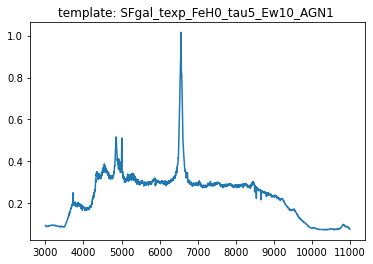

In [13]:
# to calcutlate the SNR
# input: exptime and other parameters
# output: SNR

# By SED template data

wv1,wv2,stp = 3000.4521, 10997.796,1.437337122573688
def get_instrument_config_new(readout_xbin=1, readout_ybin=1, gain=1, dark=0.017):
    wv1,wv2,stp = 3000.4521, 10997.796,1.437337122573688
    dict_i = dict()
    # user parameter
    dict_i['readout_xbin'] = readout_xbin
    dict_i['readout_ybin'] = readout_ybin
    dict_i['gain'] = gain                           # e/ADU
    dict_i['dark'] = dark                           # e/s/pix
    dict_i['readout_noise'] = 4.0                   # e/pix
    dict_i['QE'] = 1.0                              # e/pix
    dict_i['efficiency_file'] = 'chili_IFU_throughput.dat'
    # hidden parameters
    dict_i['ccd_xsize'] = stp                             # wavelenght dircection, A, delta_lambda_per_pixel
    dict_i['ccd_ysize'] = 0.1                                   # spatial direction, arcsec, spatial axis
    dict_i['extract_aper_width'] = 2 * dict_i['readout_ybin']   # binning in spatial dirction, extract spectrum with aperture of 2 pixels
    dict_i['spaxel_xsize'] = 0.2                                # arcsec
    dict_i['spaxel_ysize'] = dict_i['extract_aper_width'] * 0.1   #pixel index to unit of arcsec
    dict_i['fov_xsize'] = 6                                     # arcsec
    dict_i['fov_ysize'] = 6                                     # arcsec
    dict_i['wave_start'] = wv1
    dict_i['wave_end'] = wv2
    dict_i['wave_delta'] = dict_i['ccd_xsize'] * dict_i['readout_xbin']
    return dict_i

chili_config = build_default_calc()
chili_config['configuration'] = get_instrument_config_new()
chili_config['obst'] = 300
chili_config['repn'] = 1
chili_config['ccdspec_wave'] = np.arange(wv1,wv2,stp)
chili_config['source']['normalization']['value'] = 20.0
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'
report = perform_calculation(chili_config,calculation_mode='exptime2snr')
print(report.snr)
rs1 = report.snr
print(rs1.shape)
#report.__dict__
#plt.plot(rs1)    # exptime to snr

# By SED template data
wv1,wv2,stps = 3000.4521, 10997.796,5565
wvb1 = np.linspace(wv1,wv2,stps)
plt.plot(wvb1,rs1)    # exptime to snr
plt.title('template: SFgal_texp_FeH0_tau5_Ew10_AGN1 ')

[0.17282946 0.15915972 0.21062516 ... 2.07796534 2.18238518 2.08279175]
(3910,)


Text(0.5, 1.0, 'template: crab_lamost_data ')

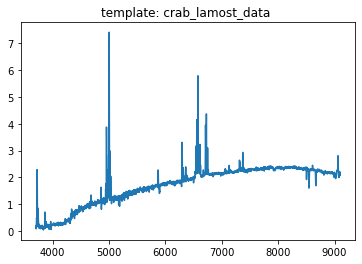

In [14]:
# to calcutlate the SNR
# input: exptime and other parameters
# output: SNR

def get_instrument_config1(readout_xbin=1, readout_ybin=1, gain=1, dark=0.017):
    
    # By LAMOST data
    wv1,wv2,stp = 3699.9863,9099.135,1.3812096284215911
    
    dict_i = dict()
    # user parameter
    dict_i['readout_xbin'] = readout_xbin
    dict_i['readout_ybin'] = readout_ybin
    dict_i['gain'] = gain                           # e/ADU
    dict_i['dark'] = dark                           # e/s/pix
    dict_i['readout_noise'] = 4.0                   # e/pix
    dict_i['QE'] = 1.0                              # e/pix
    dict_i['efficiency_file'] = 'chili_IFU_throughput.dat'
    # hidden parameters
    dict_i['ccd_xsize'] = stp                  # wavelenght dircection, A, delta_lambda_per_pixel
    dict_i['ccd_ysize'] = 0.1                                   # spatial direction, arcsec, spatial axis
    dict_i['extract_aper_width'] = 2 * dict_i['readout_ybin']   # binning in spatial dirction, extract spectrum with aperture of 2 pixels
    dict_i['spaxel_xsize'] = 0.2                                # arcsec
    dict_i['spaxel_ysize'] = dict_i['extract_aper_width'] * 0.1   #pixel index to unit of arcsec
    dict_i['fov_xsize'] = 6                                     # arcsec
    dict_i['fov_ysize'] = 6                                     # arcsec
    dict_i['wave_start'] = wv1
    dict_i['wave_end'] = wv2
    dict_i['wave_delta'] = dict_i['ccd_xsize'] * dict_i['readout_xbin']
    return dict_i

chili_config = build_default_calc()
chili_config['configuration'] = get_instrument_config1()
chili_config['obst'] = 1200
chili_config['repn'] = 1
chili_config['ccdspec_wave'] = np.arange(wv1,wv2,stp)
chili_config['source']['normalization']['value'] = 20.0
chili_config['source']['spectrum']['name'] = 'crab_lamost.fits'
chili_config['source']['spectrum']['redshift'] = 0.00010594               # by lamost data
report = perform_calculation(chili_config,calculation_mode='exptime2snr')
print(report.snr)
rs = report.snr
print(rs.shape)
# By LAMOST data
wv1,wv2,stps = 3699.9863,9099.135,3910
wvb = np.linspace(wv1,wv2,stps)
plt.plot(wvb,rs)    # exptime to snr
plt.title('template: crab_lamost_data ')
#report.__dict__

In [15]:
# from astropy.io import fits
# import numpy as np
# myhdu = fits.open(r"C:\Users\DELL\OneDrive - EDU A1\git-code\github\CHILI-ETC-CRAB\src\chili_etc\refdata\sed/SFgal_texp_FeH0_tau1_Ewd.fits")
# template_wave = myhdu[1].data['wavelength']   # A
# template_flux = myhdu[1].data['flux'] * 1e-12         # erg/s/A/cm2
# import matplotlib.pyplot as plt
# plt.figure(figsize=[16,7])
# plt.plot(template_wave,template_flux)
# print('template_wave.shape',template_wave.shape)
# print('template_flux.shape',template_flux.shape)
# template_wave
# myhdu[1].data.names
# #myhdu[1].header.comments['EXPTIME']

In [16]:
hdu = fits.open(r"C:\Users\DELL\OneDrive - EDU A1\git-code\github\CHILI-ETC-REF\Crab_nebula/crab_lamost.fits")
hdu.info() 
hdu[1].data.names

Filename: C:\Users\DELL\OneDrive - EDU A1\git-code\github\CHILI-ETC-REF\Crab_nebula/crab_lamost.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   3909R x 5C   [E, E, E, E, E]   


['flux', 'Inverse', 'wavelength', 'Andmask', 'Ormask']

Text(0.5, 1.0, 'crab - report.SNR / EXP 20min')

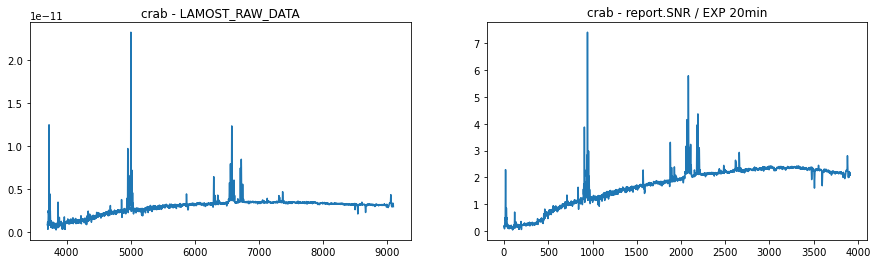

In [18]:
hdu = fits.open(r"C:\Users\DELL\OneDrive - EDU A1\git-code\github\CHILI-ETC-REF\Crab_nebula/crab_lamost.fits")
template_flux = hdu[1].data['flux']*1e-12
template_wave = hdu[1].data['wavelength']
plt.figure(figsize=[15,4])
plt.subplot(121)
plt.plot(template_wave,template_flux)
plt.title('crab - LAMOST_RAW_DATA')
plt.subplot(122)
plt.plot(report.snr)
plt.title('crab - report.SNR / EXP 20min')

# Parameterts Setting:
- FILTER: sdss-g
- EXPTIME: 20min
- binning: 1
- straylight: False
- filter band: sdss_g
- redshift: Z = 0.00010594

In [19]:
# to calcutlate the exposure time
# input: SNR and other parameters
# output: exposure time

# The target SNR is (default = 20): 20
# Calculate the visits to obtain SNR = 20.0.

chili_config = build_default_calc()    #load the default model
chili_config['targetsnr'] = 20         #change special parameters target SNR
chili_config['repn'] = 1               #change special parameters you want
chili_config['source']['normalization']['value'] = 20.0    #change special parameters you want
chili_config['source']['spectrum']['name'] = 'crab_lamost.fits'  #change special parameters you want
report = perform_calculation(chili_config,calculation_mode='snr2exptime')
print('the expect exposure time is:',report.exptime)

#report.__dict__

the expect exposure time is: 1007451.3593761624


In [20]:
# SNR TO LIMIT MAGNITUDE
chili_config['source']['spectrum']['name'] = 'crab_lamost.fits'  #change special parameters you want
report = perform_calculation(chili_config, calculation_mode='snr2limitmag')
print(report.limitmag)

14.156561665024938


In [21]:
# SNR2EXPTIME
chili_config = build_default_calc()
chili_config['targetsnr'] = 10                      ###
chili_config['obst'] = 300
chili_config['source']['normalization']['value'] = 18.0
chili_config['source']['spectrum']['name'] = 'crab_lamost.fits'
report = perform_calculation(chili_config, calculation_mode='snr2exptime')
print(report.exptime)

8163.269810387888
